## Observations and Insights 

%matplotlib inline

In [174]:
%matplotlib inline

In [175]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

df = study_results.merge(mouse_metadata, on = "Mouse ID")



# Display the data table for preview

df.head()




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [176]:
unique_mice = df.drop_duplicates('Mouse ID')
unique_mice.count()

Mouse ID              249
Timepoint             249
Tumor Volume (mm3)    249
Metastatic Sites      249
Drug Regimen          249
Sex                   249
Age_months            249
Weight (g)            249
dtype: int64

In [177]:
# Checking the number of mice.
df.count()


Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [178]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

clean_df = df.groupby(['Mouse ID'])

In [179]:
cleaned_df = df.drop_duplicates(['Mouse ID','Timepoint'])

In [180]:
# Optional: Get all the data for the duplicate mouse ID. 

cleaned_df.head(500)




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
495,j989,20,41.635344,1,Ramicane,Male,8,19
496,j989,25,39.934112,1,Ramicane,Male,8,19
497,j989,30,34.671781,1,Ramicane,Male,8,19
498,j989,35,35.115590,1,Ramicane,Male,8,19


In [181]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.





In [182]:
# Checking the number of mice in the clean DataFrame.

cleaned_df.count()
final_df = cleaned_df.rename(columns={"Tumor Volume (mm3)":"Tumor Volume in mm3", "Weight (g)":"Weight in grams"})


## Summary Statistics

In [183]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimine_group = final_df.groupby(['Drug Regimen'])

# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean = regimine_group['Tumor Volume in mm3'].mean()
median = regimine_group['Tumor Volume in mm3'].median()



In [184]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimine_group['Tumor Volume in mm3'].describe()
# This method produces everything in a single groupby function


,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,156.0,52.393463,6.568014,45.000000,47.046068,50.909965,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

In [185]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_count = regimine_group['Mouse ID'].nunique()
mice_count


Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

In [186]:
x_axis = np.arange(len(mice_count))

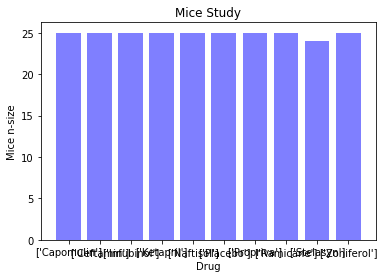

<Figure size 216x432 with 0 Axes>

In [187]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

plt.bar(x_axis, mice_count, color='b', alpha=0.5, align="center")
drug_regimen = regimine_group['Drug Regimen']
drug_list = drug_regimen.unique()
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,drug_list)
plt.title("Mice Study")
plt.xlabel("Drug")
plt.ylabel("Mice n-size")
plt.figure(figsize=(3,6))
plt.show()

In [188]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

final_df.head()

gender = final_df.groupby(['Sex'])

gender.nunique(['Mouse ID'])


,Mouse ID,Timepoint,Tumor Volume in mm3,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight in grams
Sex,,,,,,,,
Female,124,10,807,5,10,1,24,14
Male,125,10,834,5,10,1,24,14


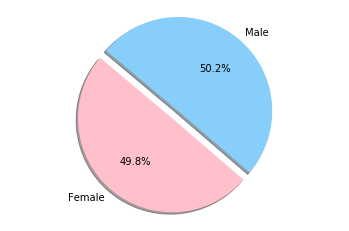

In [189]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [124, 125]

# The colors of each section of the pie chart
colors = ["pink", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0.0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

plt.show();

## Quartiles, Outliers and Boxplots

In [190]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

start = df.drop_duplicates(subset='Mouse ID',keep="first")
final = df.drop_duplicates(subset='Mouse ID',keep="last")


start_regimine = start.groupby(['Drug Regimen'])
final_regimine = final.groupby(['Drug Regimen'])


final_regimine.sum().head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Drug Regimen,,,,,
Capomulin,1025,916.689193,32,351,503
Ceftamin,765,1443.849421,43,320,685
Infubinol,765,1454.456145,40,410,683
Ketapril,815,1570.154786,48,368,702
Naftisol,805,1530.143925,50,306,681


In [191]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [192]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [193]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [194]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

meantumorvolume = final_df.groupby(["Tumor Volume in mm3"]).mean()



In [195]:
meantumorvolume_df = pd.DataFrame(meantumorvolume)
meantumorvolume_df['Weight in grams'].head()

Tumor Volume in mm3
22.050126    16.0
23.343598    17.0
24.365505    16.0
25.472143    17.0
26.546993    16.0
Name: Weight in grams, dtype: float64

In [200]:
print(final_df['Weight in grams'])

0       22
1       22
2       22
3       22
4       22
        ..
1888    17
1889    17
1890    17
1891    17
1892    17
Name: Weight in grams, Length: 1888, dtype: int64


In [220]:
weight = final_df['Weight in grams'].count()

print(weight)

1888


In [221]:
tumor = meantumorvolume_df['Weight in grams'].count()

print(tumor)

1640


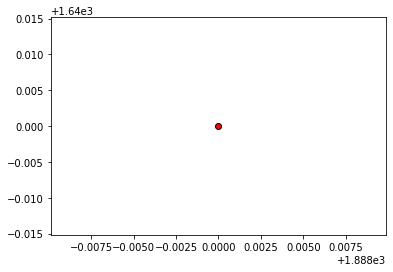

In [222]:
plt.scatter([weight], [tumor], marker="o", facecolors="red", edgecolors="black")

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
